 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [162]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [163]:
# Reading whale returns
file_path = Path("Resources/whale_returns.csv")
whale_stocks = pd.read_csv(file_path, index_col='Date', parse_dates=True)
whale_stocks.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [164]:
# Count nulls
whale_stocks.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [165]:
# Drop nulls
whale_stocks_df = whale_stocks.dropna()

In [166]:
whale_stocks_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [167]:
# Reading algorithmic returns
algorithmic_path = Path("Resources/algo_returns.csv")
algo_stocks = pd.read_csv(algorithmic_path, index_col='Date', parse_dates=True)
algo_stocks.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [168]:
# Count nulls
algo_stocks.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [169]:
# Drop nulls
algorithmic_df = algo_stocks.dropna()
algorithmic_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [170]:
# Reading S&P 500 Closing Prices
sp500 = Path("Resources/sp500_history.csv")
sp500stocks = pd.read_csv(sp500,index_col='Date',parse_dates=True)
sp500stocks = sp500stocks.sort_index()
sp500stocks.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [171]:
# Check Data Types
sp500stocks.dtypes

Close    object
dtype: object

In [172]:
# Fix Data Types
sp500stocks['Close'] = sp500stocks['Close'].astype(str).str.replace('$','').astype(float)
sp500stocks.head()


<ipython-input-172-232f13d0fa75>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500stocks['Close'] = sp500stocks['Close'].astype(str).str.replace('$','').astype(float)


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [173]:
# Calculate Daily Returns
df_sp500_returns =sp500stocks.pct_change()#get diffrence from pervious data point to newer date point.
df_sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [174]:
# Drop nulls
df_sp500=df_sp500_returns.dropna()
df_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [175]:
df_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [176]:
# Rename `Close` Column to be specific to this portfolio.
df_sp500 = df_sp500.rename(columns={'Close':'SP_500'},inplace = False)

In [177]:
df_sp500.head()

,SP_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [178]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([algorithmic_df,whale_stocks_df,df_sp500],axis = 1,join='inner')# inner join keys need to match and outer join get all
df_row = df.dropna()
df_row.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

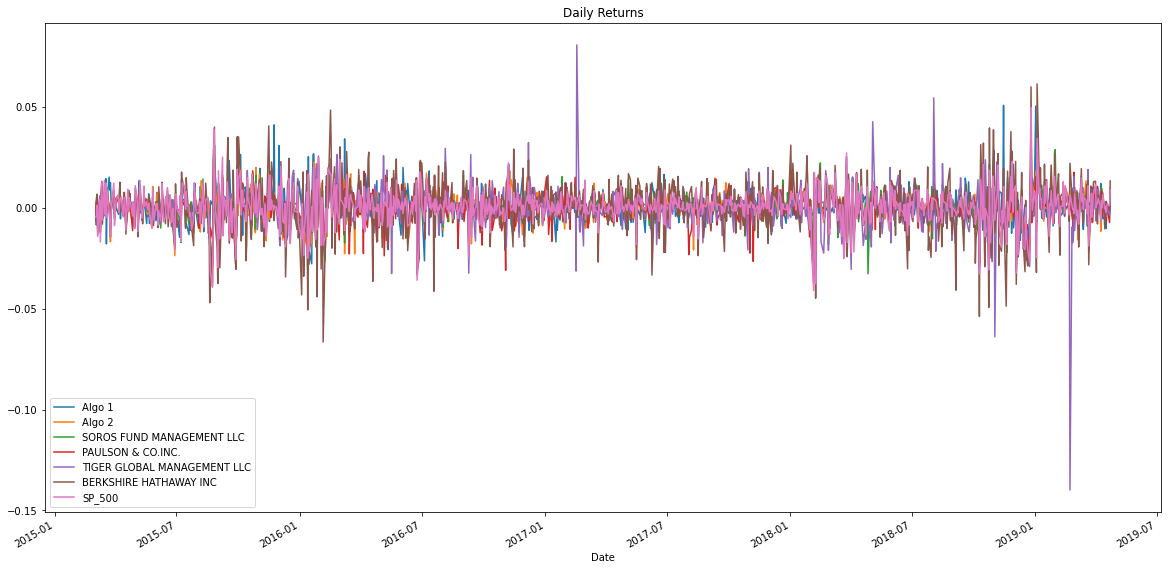

In [179]:
# Plot daily returns of all portfolios
df_row.plot(figsize=(20,10),title = "Daily Returns");

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

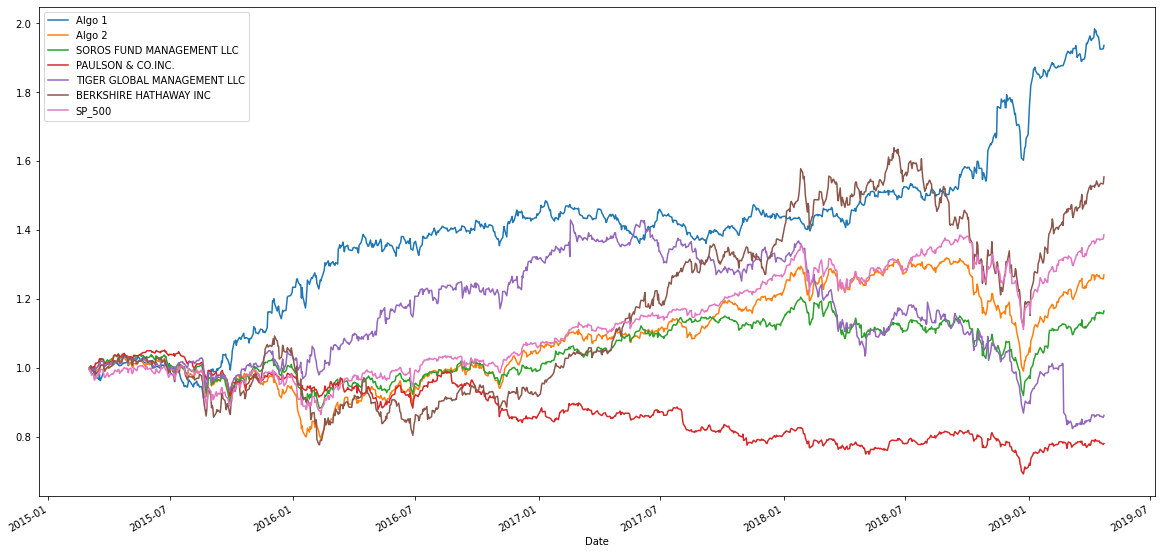

In [180]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+df_row).cumprod()#adding 1 plus for cumulative formula (pervious value  * next value)
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


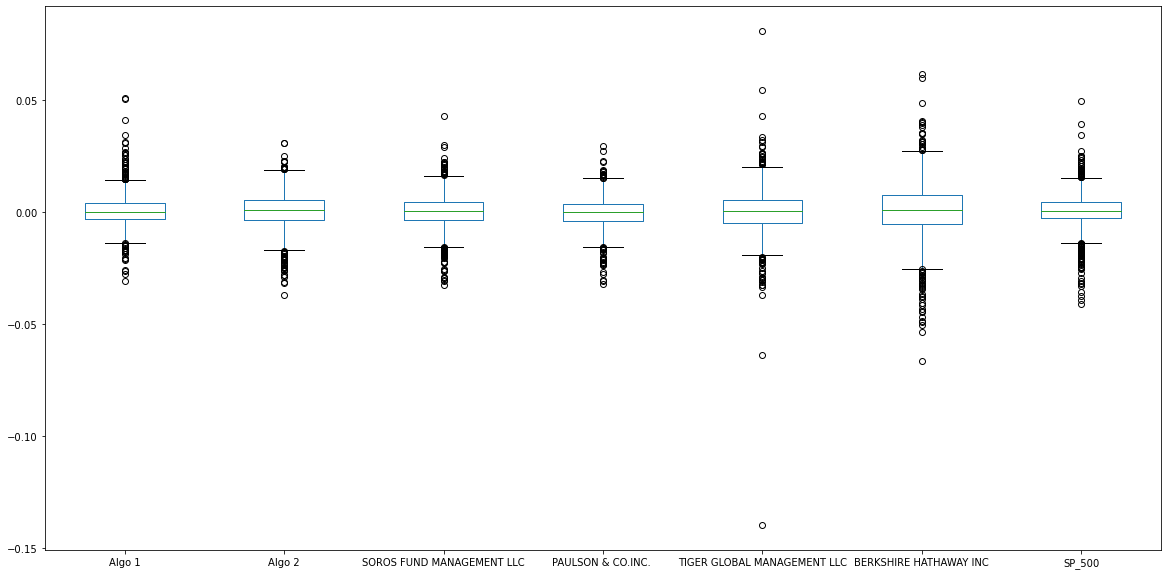

In [181]:
# Box plot to visually show risk
df_row.plot.box(figsize=(20,10));

### Calculate Standard Deviations

In [182]:
# Calculate the daily standard deviations of all portfolios
daily_return_std = df_row.std()
daily_return_std.head(10)

Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
SP_500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [183]:
# Calculate  the daily standard deviation of S&P 500
sp500risk = df_row['SP_500'].std()
daily_return_std =daily_return_std.sort_values(ascending=False)
#print(daily_return_std)
# Determine which portfolios are riskier than the S&P 500
daily_return_std>sp500risk
#"Tiger global and Berkshire hathaway are riskier"

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
SP_500                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [184]:
# Calculate the annualized standard deviation (252 trading days)
df_row.std()*np.sqrt(252)#sqrt means square root (252)

Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
SP_500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

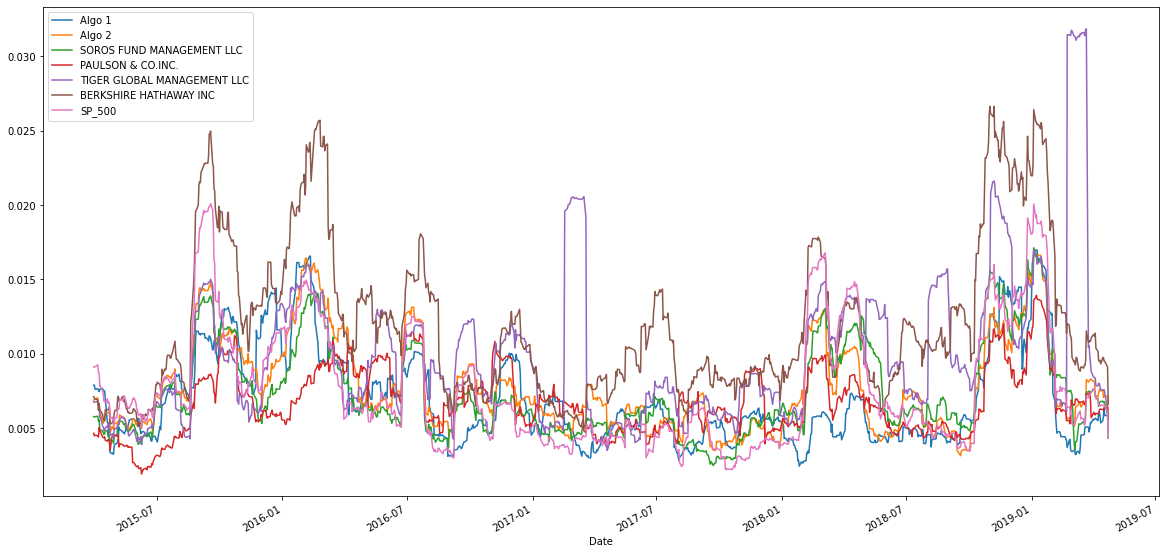

In [185]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_row.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [186]:
# Calculate the correlation
price_correlation = df_row.corr()
# Display de correlation matrix
price_correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_500
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371
SP_500,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60 day beta '}, xlabel='Date'>

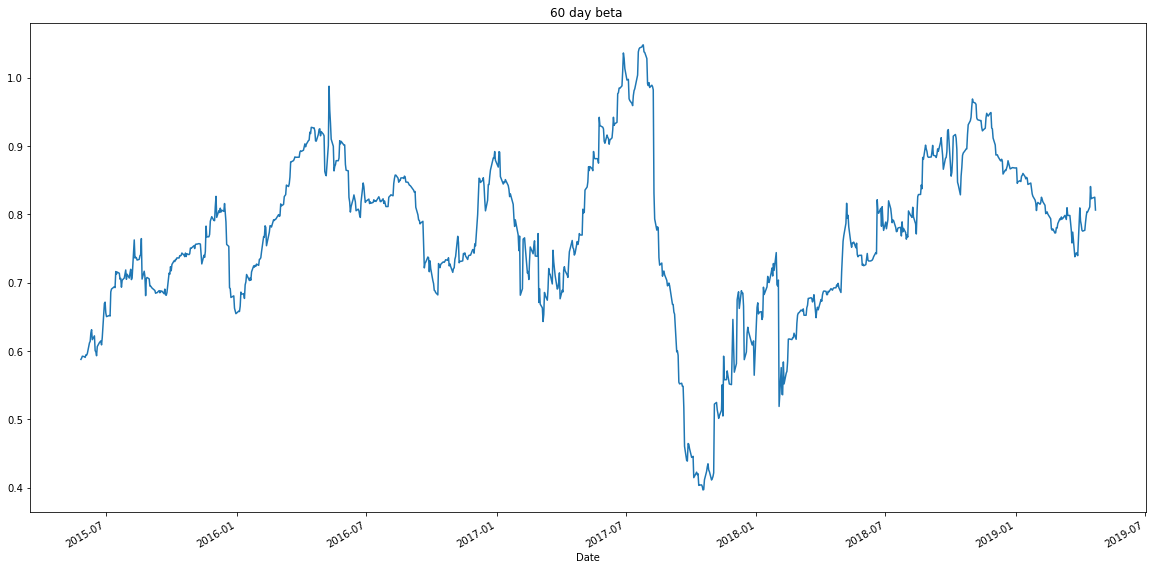

In [187]:
# Calculate covariance of a single portfolio
covariance = df_row['SOROS FUND MANAGEMENT LLC'].rolling(window =60).cov(df_row['SP_500'])
# Calculate variance of S&P 500
variance = df_row['SP_500'].rolling(window =60).var()
# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20,10),title = "60 day beta ")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Weighted average'}, xlabel='Date'>

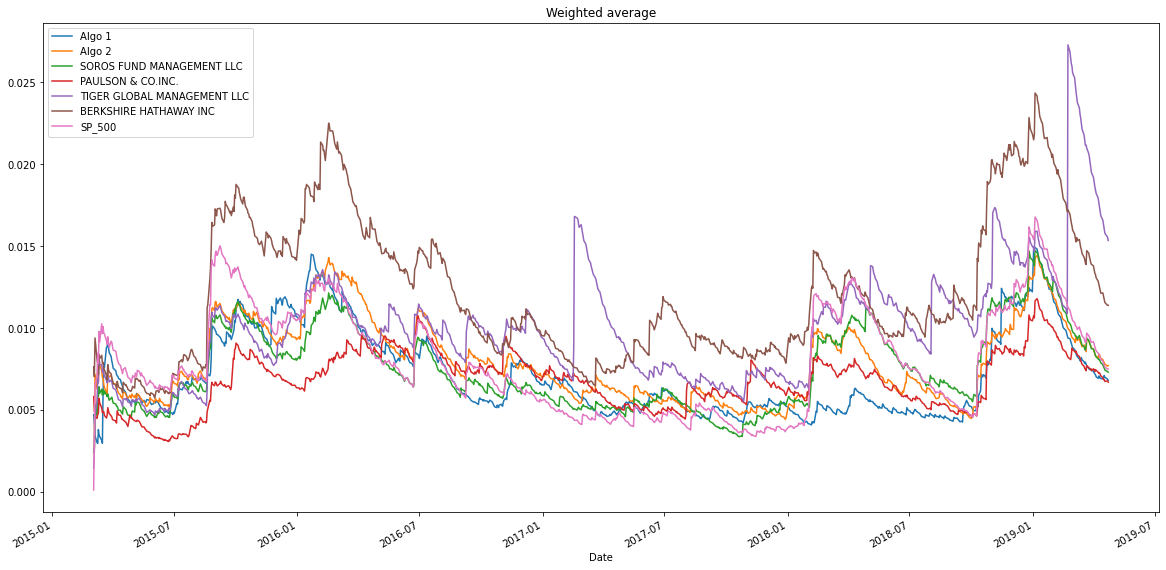

In [188]:
# Use `ewm` to calculate the rolling window
df_row.ewm(halflife=21).std().plot(figsize=(20,10),title = 'Weighted average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [189]:
# Annualized Sharpe Ratios
sharpe_ratio = (df_row.mean()*252)/(df_row.std()*np.sqrt(252))
sharpe_ratio

Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
SP_500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'sharpe ratio'}>

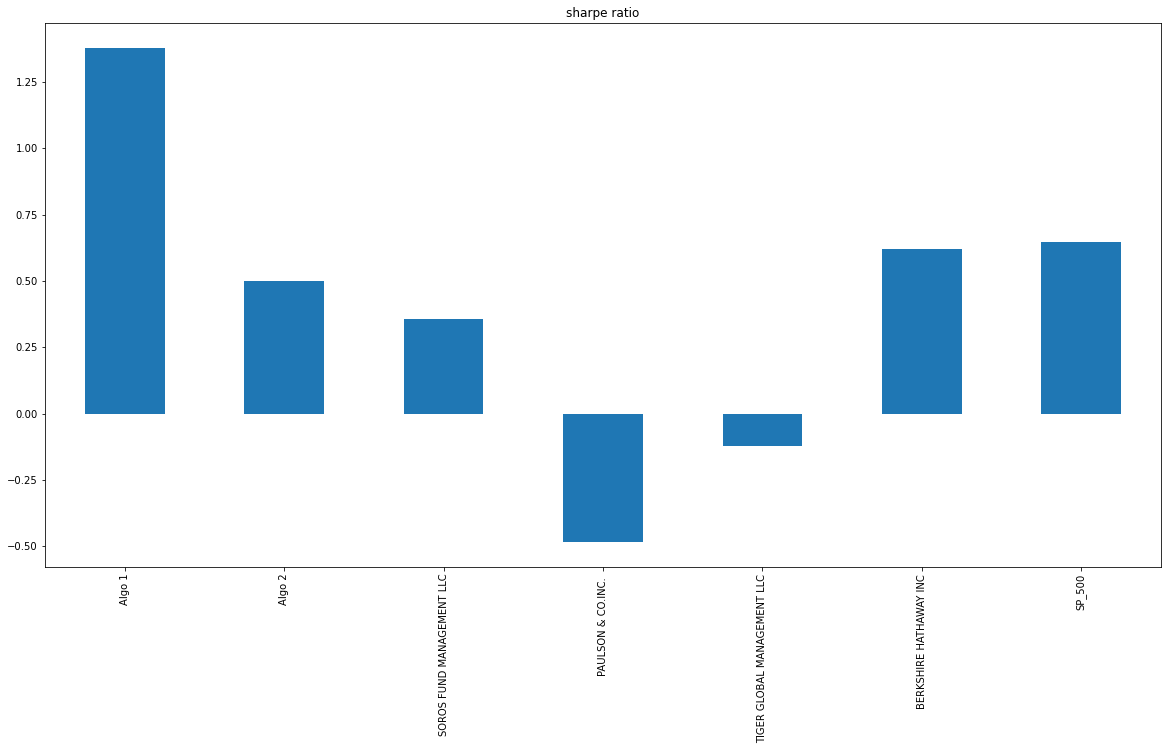

In [190]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize=(20,10),title = 'sharpe ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Yes the algorithmic strategies beat the sp500 and whalse portfolios as shown in the chart

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [191]:
# Reading data from 1st stock google
file_path = Path("Resources/goog_historical.csv")
goog_stocks = pd.read_csv(file_path, index_col='Trade DATE', parse_dates=True)
goog_stocks = goog_stocks.sort_index()
goog_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [192]:
# Reading data from 2nd stock -Apple
file_path = Path("Resources/aapl_historical.csv")
aapl_stocks = pd.read_csv(file_path, index_col='Trade DATE', parse_dates=True)
aapl_stocks = aapl_stocks.sort_index()
aapl_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [193]:
# Reading data from 3rd stock
file_path = Path("Resources/cost_historical.csv")
cost_stocks = pd.read_csv(file_path, index_col='Trade DATE', parse_dates=True)
cost_stocks = cost_stocks.sort_index()
cost_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [194]:
# Combine all stocks in a single DataFrame
all_df = pd.concat([goog_stocks,aapl_stocks,cost_stocks],axis = 0,join='inner')
all_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [195]:
# Reset Date index
all_df =all_df.reset_index()
all_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,COST,244.62
746,2019-05-06,COST,244.23
747,2019-05-07,COST,240.18
748,2019-05-08,COST,241.34


In [196]:
# Reorganize portfolio data by having a column per symbol
new_df =all_df.pivot_table(values='NOCP',index = 'Trade DATE',columns='Symbol',dropna=True)
new_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [197]:
# Calculate daily returns
dr_df = new_df.pct_change().dropna()
# Drop NAs

# Display sample data
dr_df

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [198]:
# Set weights
weights = [1/3, 1/3, 1/3]
goog_weight = 0.33
appl_weight = 0.33
cost_weight = 0.33

# Calculate portfolio return
portfolio_return = goog_weight*dr_df['GOOG']+appl_weight*dr_df['AAPL']+cost_weight*dr_df['COST']

# Display sample data
portfolio_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.009963
2018-05-16    0.009309
2018-05-17   -0.001579
2018-05-18   -0.006000
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [199]:
# Join your returns DataFrame to the original returns DataFrame
final_df = pd.concat([dr_df,df_row],axis = 1,join='inner')
final_df.head()

,AAPL,COST,GOOG,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_500
2018-05-14,-0.002333,0.000613,0.001766,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.009088,-0.002042,-0.019060,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009333,0.016523,0.002354,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.006324,0.004479,-0.002940,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.003637,-0.003206,-0.011339,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


In [200]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_df.dropna()
final_df.head()

,AAPL,COST,GOOG,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_500
2018-05-14,-0.002333,0.000613,0.001766,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.009088,-0.002042,-0.019060,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009333,0.016523,0.002354,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.006324,0.004479,-0.002940,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.003637,-0.003206,-0.011339,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [201]:
# Calculate the annualized `std`
final_df.std()*np.sqrt(252)

AAPL                           0.296951
COST                           0.212034
GOOG                           0.255500
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
SP_500                         0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

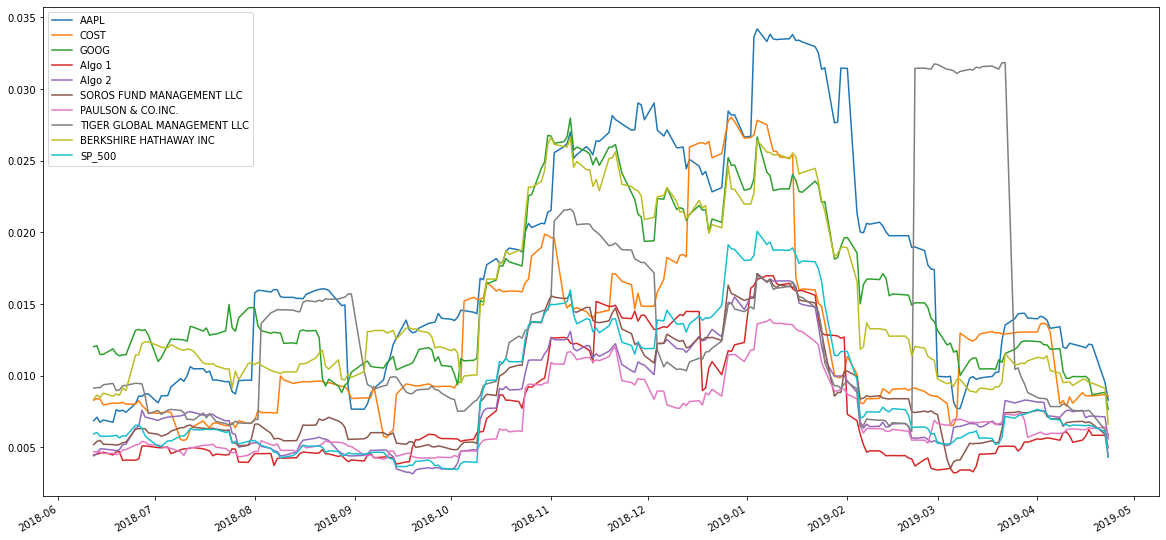

In [202]:
# Calculate rolling standard deviation
final_df.rolling(window=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:title={'center':'Plot Correlation'}>

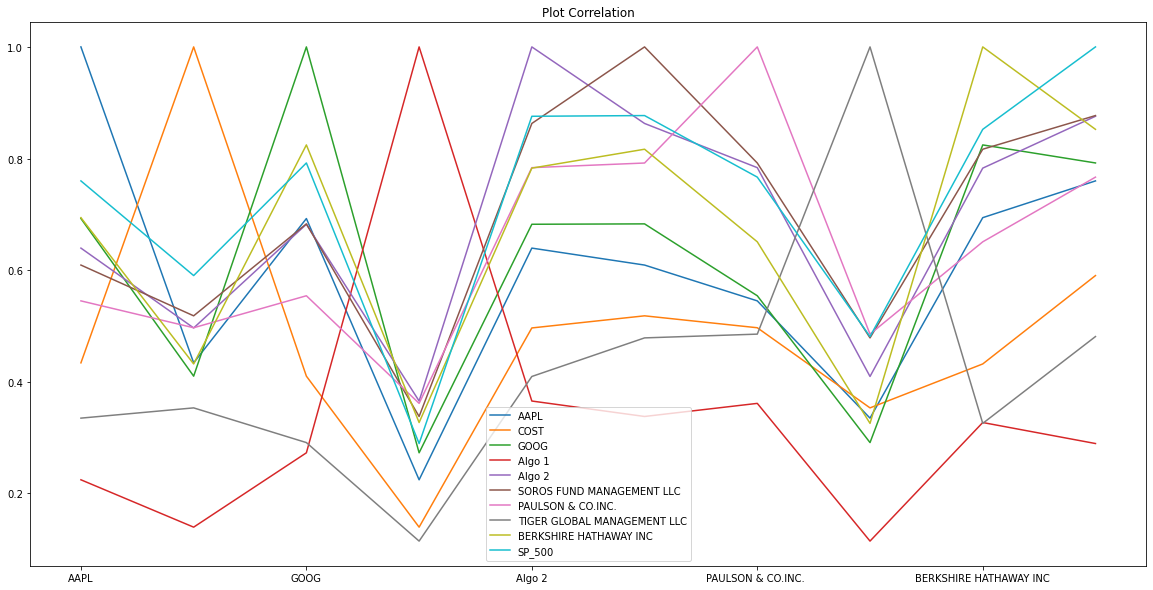

In [203]:
# Calculate and plot the correlation
price_correlation = final_df.corr()
# Display de correlation matrix
price_correlation.plot(figsize=(20,10),title = 'Plot Correlation')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60 day beta '}>

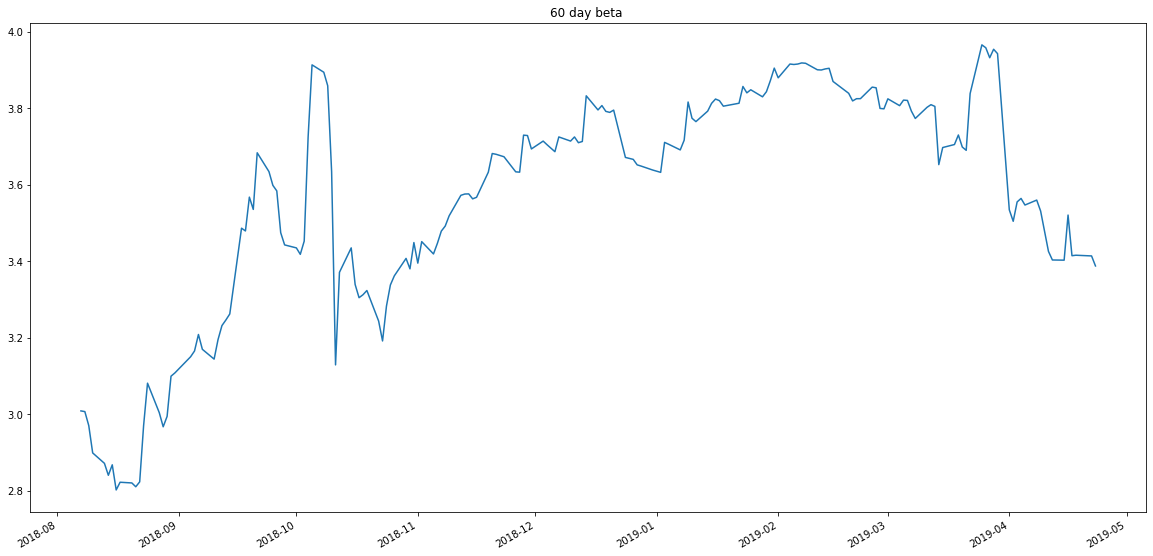

In [210]:
# Calculate and plot Beta
# covariance
covariance_google = final_df['GOOG'].rolling(window =60).cov(final_df['SP_500'])
covariance_appl = final_df['AAPL'].rolling(window =60).cov(final_df['SP_500'])
covariance_cost = final_df['COST'].rolling(window =60).cov(final_df['SP_500'])
covariance = covariance_google+covariance_appl+covariance_cost
# Calculate variance of S&P 500
variance = final_df['SP_500'].rolling(window =60).var()
# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20,10),title = "60 day beta ")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [211]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = (final_df.mean()*252)/(final_df.std()*np.sqrt(252))
sharpe_ratio

AAPL                           0.490850
COST                           1.244419
GOOG                           0.714034
Algo 1                         2.035665
Algo 2                         0.080607
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
SP_500                         0.584820
dtype: float64

<AxesSubplot:title={'center':'sharpe ratio'}>

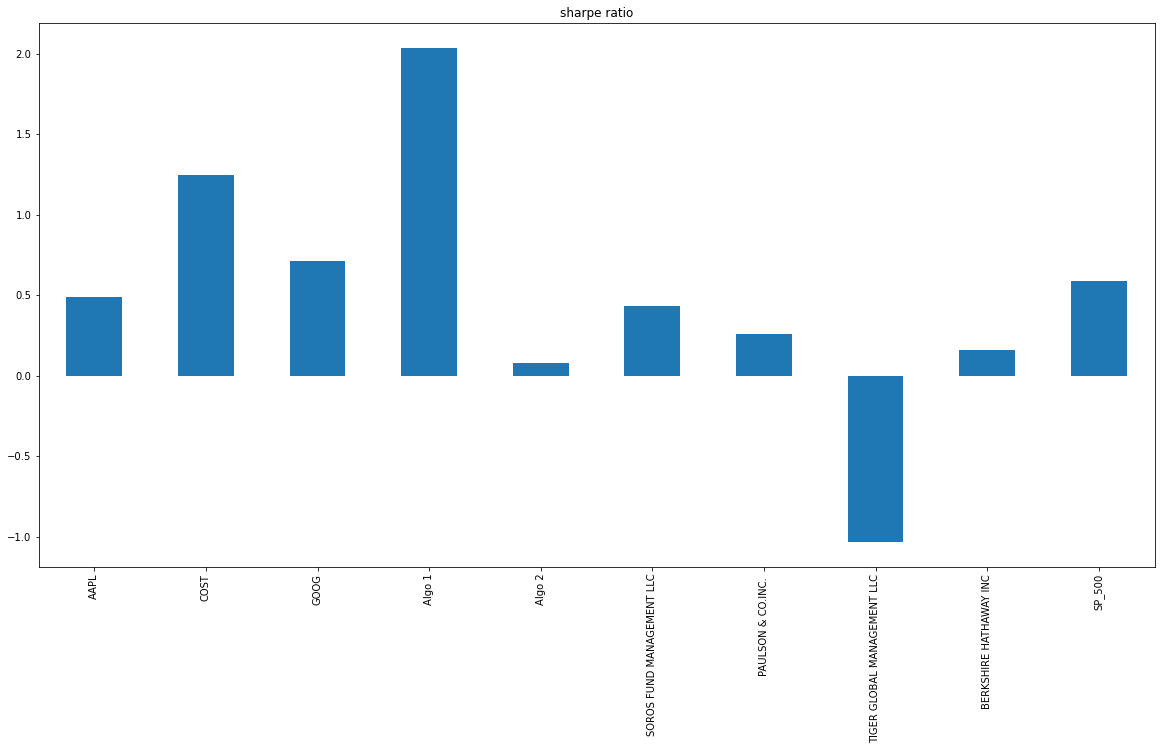

In [212]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize=(20,10),title = 'sharpe ratio')

### How does your portfolio do?

Write your answer here!

algo-1 beat the all the result but AAPL COST and GOOGLE also perfome good and it's less risk than algo 1